In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix



# Classifier Pre-processing

In [5]:
df = pd.read_csv('combinedHealthPred.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86


In [6]:
bins = [0,18.5,25,30, 100]
slots = ['under-weight','healthy','over-weight', 'obese']

df['BMI_range'] = pd.cut(df['bmi'], bins = bins,labels = slots)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses,BMI_range
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92,over-weight
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55,obese
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46,obese
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47,healthy
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86,over-weight


In [7]:
class_df = df.drop(['bmi', 'children', 'smoker', 'region', 'BMI_range'], axis = 1)
class_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,expenses
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,16884.92
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,1725.55
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,4449.46
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,21984.47
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,3866.86


In [8]:


class_df = class_df.drop(['id'], axis = 1)
X = class_df.values
y = df['Response']

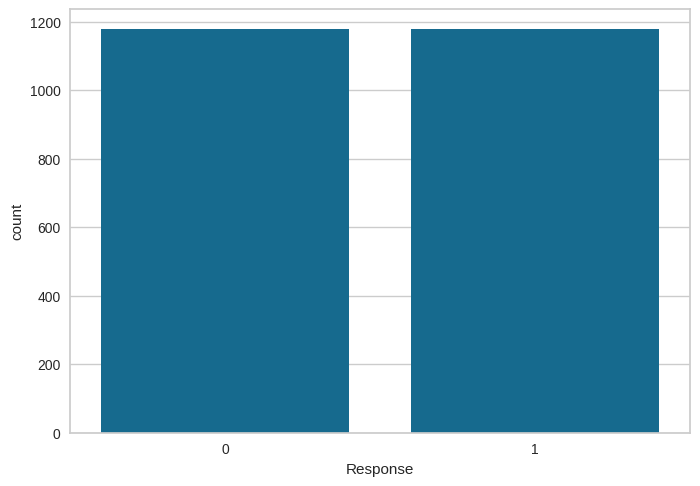

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 123)

X, y = ros.fit_resample(X, y)

ax = sns.countplot(x = y)

In [ ]:
label_encoder_gender = LabelEncoder()
label_encoder_Driving_License = LabelEncoder()
label_encoder_Previously_Insured = LabelEncoder()
label_encoder_Vehicle_Age = LabelEncoder()
label_encoder_Vehicle_Damage = LabelEncoder()

X[:,0] = label_encoder_gender.fit_transform(X[:,0])
X[:,2] = label_encoder_Driving_License.fit_transform(X[:,2])
X[:,4] = label_encoder_Previously_Insured.fit_transform(X[:,4])
X[:,5] = label_encoder_Vehicle_Age.fit_transform(X[:,5])
X[:,6] = label_encoder_Vehicle_Damage.fit_transform(X[:,6])

In [ ]:

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 43)


In [ ]:
X_test

array([[-1.11440781,  0.21729562,  0.02916059, ...,  1.12320434,
        -1.        , -0.8439344 ],
       [ 0.89733758,  1.71494078,  0.02916059, ..., -0.94149372,
        -1.        ,  2.3334287 ],
       [ 0.89733758,  0.6257443 ,  0.02916059, ...,  1.22094153,
         1.        ,  0.00288183],
       ...,
       [-1.11440781, -1.07612519,  0.02916059, ...,  0.21913537,
        -1.        , -0.86525884],
       [-1.11440781, -1.34842431,  0.02916059, ..., -0.81932224,
         1.        , -0.84466625],
       [-1.11440781, -1.28034953,  0.02916059, ..., -1.61343688,
        -1.        , -0.94549308]])

In [ ]:
df_x_test = pd.DataFrame(X_test, columns = [
                                'Gender',
                                'Age',
                                'Driving_License',
                                'Region_Code',
                                'Previously_Insured',
                                'Vehicle_Age',
                                'Vehicle_Damage',
                                'Annual_Premium',
                                'Policy_Sales_Channel',
                                'Vintage',
                                'Response',
                                'expenses'
                                ])
# df_y_test = pd.DataFrame(
#     y_test, columns = ['Response']
# )

df_x_train = pd.DataFrame(X_standard, columns = [
                                'Gender',
                                'Age',
                                'Driving_License',
                                'Region_Code',
                                'Previously_Insured',
                                'Vehicle_Age',
                                'Vehicle_Damage',
                                'Annual_Premium',
                                'Policy_Sales_Channel',
                                'Vintage',
                                'Response',
                                'expenses'
                                ])

In [ ]:
df_x_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,expenses
0,0.897338,0.217296,0.029161,0.105104,-0.583564,2.455549,0.620903,0.536005,-1.381697,0.781124,1.0,0.227886
1,0.897338,2.395689,0.029161,-1.945069,-0.583564,-0.750420,-1.610557,0.121639,-1.381697,0.365741,-1.0,-0.957407
2,0.897338,0.421520,0.029161,0.105104,-0.583564,2.455549,0.620903,0.406628,-1.381697,-1.540134,1.0,-0.744428
3,0.897338,-1.348424,0.029161,-1.289013,1.713609,0.852564,-1.610557,-0.172873,0.871778,0.610084,-1.0,0.626614
4,-1.114408,-0.803826,0.029161,1.171194,1.713609,0.852564,-1.610557,-0.240137,0.871778,-1.393528,-1.0,-0.789981


In [ ]:
df_x_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,expenses
0,-1.114408,0.217296,0.029161,0.105104,-0.583564,-0.750420,0.620903,0.837345,0.335236,1.123204,-1.0,-0.843934
1,0.897338,1.714941,0.029161,1.909256,1.713609,-0.750420,-1.610557,0.424357,-1.703622,-0.941494,-1.0,2.333429
2,0.897338,0.625744,0.029161,0.105104,-0.583564,2.455549,0.620903,1.341676,0.371005,1.220942,1.0,0.002882
3,0.897338,2.191464,0.029161,1.581228,-0.583564,-0.750420,0.620903,0.606024,-1.381697,-0.086293,-1.0,-0.806206
4,0.897338,1.374567,0.029161,-1.535034,-0.583564,2.455549,0.620903,-0.553936,0.371005,0.219135,1.0,0.959081


In [ ]:
df_x_train.to_csv('/train.csv', index=False)
df_x_test.to_csv('/test.csv', index=False)

# AutoML

In [ ]:
!pip install requests
!pip install tabulate
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install mlflow

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=a9ce3cab34d00e141a62d8ad8bf658f8677181787bfd45acc1431d7b8c9f8bac
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard

import mlflow
import mlflow.h2o
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType

import pandas as pd
import json

from sklearn.metrics import f1_score, accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Run the following command to initialize H2O on your local machine (single-node cluster):
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjtj6fqdi
  JVM stdout: /tmp/tmpjtj6fqdi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjtj6fqdi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_57w7ag
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Initialize MLFlow client
client = MlflowClient()

# Set up MlFlow experiment
experiment_name = 'automl-insurance'

try:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = client.get_experiment_by_name(experiment_name)
except:
    experiment = client.get_experiment_by_name(experiment_name)

mlflow.set_experiment(experiment_name)

# Print experiment details
print(f"Name: {experiment_name}")
print(f"Experiment_id: {experiment.experiment_id}")
print(f"Artifact Location: {experiment.artifact_location}")
print(f"Tags: {experiment.tags}")
print(f"Lifecycle_stage: {experiment.lifecycle_stage}")
print(f"Tracking uri: {mlflow.get_tracking_uri()}")

Name: automl-insurance
Experiment_id: 105580036626967464
Artifact Location: file:///content/mlruns/105580036626967464
Tags: {}
Lifecycle_stage: active
Tracking uri: file:///content/mlruns


In [ ]:
# Import data directly as H2O frame: Frame: A Frame is a collection of Vec objects. It is a 2D array of elements.
main_frame = h2o.import_file(path = '/train.csv')

# Save data types of columns in H2O frame (for matching with test set during prediction)
with open('/train_col_types.json', 'w') as fp:
    json.dump(main_frame.types, fp)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictors = [n for n in main_frame.col_names]

# Factorize target variable so that autoML tackles classification problem (instead of regression)
main_frame['Response'] = main_frame['Response'].asfactor()

# Visualize H2O frame structure
main_frame.head()

Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,expenses
0.897338,0.217296,0.0291606,0.105104,-0.583564,2.45555,0.620903,0.536005,-1.3817,0.781124,1,0.227886
0.897338,2.39569,0.0291606,-1.94507,-0.583564,-0.75042,-1.61056,0.121639,-1.3817,0.365741,-1,-0.957407
0.897338,0.42152,0.0291606,0.105104,-0.583564,2.45555,0.620903,0.406628,-1.3817,-1.54013,1,-0.744428
0.897338,-1.34842,0.0291606,-1.28901,1.71361,0.852564,-1.61056,-0.172873,0.871778,0.610084,-1,0.626614
-1.11441,-0.803826,0.0291606,1.17119,1.71361,0.852564,-1.61056,-0.240137,0.871778,-1.39353,-1,-0.789981
-1.11441,-1.1442,0.0291606,0.515139,-0.583564,0.852564,0.620903,-1.72953,1.01486,0.280221,-1,-0.798601
0.897338,-1.21227,0.0291606,-1.28901,-0.583564,0.852564,0.620903,-0.487451,0.871778,1.17207,-1,-0.448004
-1.11441,1.03419,0.0291606,0.105104,-0.583564,-0.75042,0.620903,0.0314947,-1.3817,-0.990362,1,-0.522994
-1.11441,-1.1442,0.0291606,-1.94507,1.71361,0.852564,-1.61056,-0.23277,0.871778,-1.52792,-1,-0.591417
-1.11441,-0.599602,0.0291606,-1.69905,1.71361,0.852564,-1.61056,-0.163769,0.871778,-0.892625,-1,1.16914


In [ ]:
# Wrap autoML training with MLflow
with mlflow.start_run():
    aml = H2OAutoML(
                    max_models=13, # Run AutoML for n base models
                    seed=42,
                    balance_classes=True, # Our target classes are imbalanced, so we set this to True
                    sort_metric='logloss', # Sort models by logloss (main metric for binary classification)
                    verbosity='info', # Turn on verbose info
                    exclude_algos = ['GLM', 'DRF'], # Specify which algorithms to exclude
                   )

    aml.train(x = predictors, y = 'Response', training_frame = main_frame)

    # Set metrics to log
    mlflow.log_metric("log_loss", aml.leader.logloss())
    mlflow.log_metric("AUC", aml.leader.auc())

    # Log best model (mlflow.h2o module provides API for logging & loading H2O models)
    mlflow.h2o.log_model(aml.leader,
                         artifact_path="model"
                        )

    model_uri = mlflow.get_artifact_uri("model")
    print(model_uri)

    # Print and view AutoML Leaderboard
    lb = get_leaderboard(aml, extra_columns='ALL')
    print(lb.head(rows=lb.nrows))

    # Get IDs of current experiment run
    exp_id = experiment.experiment_id
    run_id = mlflow.active_run().info.run_id

    # Save leaderboard as CSV
    lb_path = f'mlruns/{exp_id}/{run_id}/artifacts/model/leaderboard.csv'
    lb.as_data_frame().to_csv(lb_path, index=False)
    print(f'Leaderboard saved in {lb_path}')

AutoML progress: |
19:55:58.786: Project: AutoML_1_20240207_195558
19:55:58.795: 5-fold cross-validation will be used.
19:55:58.803: Setting stopping tolerance adaptively based on the training frame: 0.02061089119916432
19:55:58.803: Build control seed: 42
19:55:58.804: training frame: Frame key: AutoML_1_20240207_195558_training_py_1_sid_a9d7    cols: 12    rows: 2354  chunks: 8    size: 99571  checksum: 2137517987391226212
19:55:58.804: validation frame: NULL
19:55:58.804: leaderboard frame: NULL
19:55:58.804: blending frame: NULL
19:55:58.805: response column: Response
19:55:58.805: fold column: null
19:55:58.805: weights column: null
19:55:58.833: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {Dee

In [ ]:
log = aml.event_log
log

timestamp,level,stage,message,name,value
19:55:58.786,INFO,Workflow,Project: AutoML_1_20240207_195558,,
19:55:58.795,INFO,Validation,5-fold cross-validation will be used.,,
19:55:58.803,INFO,Validation,Setting stopping tolerance adaptively based on the training frame: 0.02061089119916432,,
19:55:58.803,INFO,Validation,Build control seed: 42,,
19:55:58.804,INFO,DataImport,training frame: Frame key: AutoML_1_20240207_195558_training_py_1_sid_a9d7 cols: 12 rows: 2354 chunks: 8 size: 99571 checksum: 2137517987391226212,,
19:55:58.804,INFO,DataImport,validation frame: NULL,,
19:55:58.804,INFO,DataImport,leaderboard frame: NULL,,
19:55:58.804,INFO,DataImport,blending frame: NULL,,
19:55:58.805,INFO,DataImport,response column: Response,,
19:55:58.805,INFO,DataImport,fold column: null,,


In [ ]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/13
# GBM base models (used / total),3/6
# XGBoost base models (used / total),0/5
# DeepLearning base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


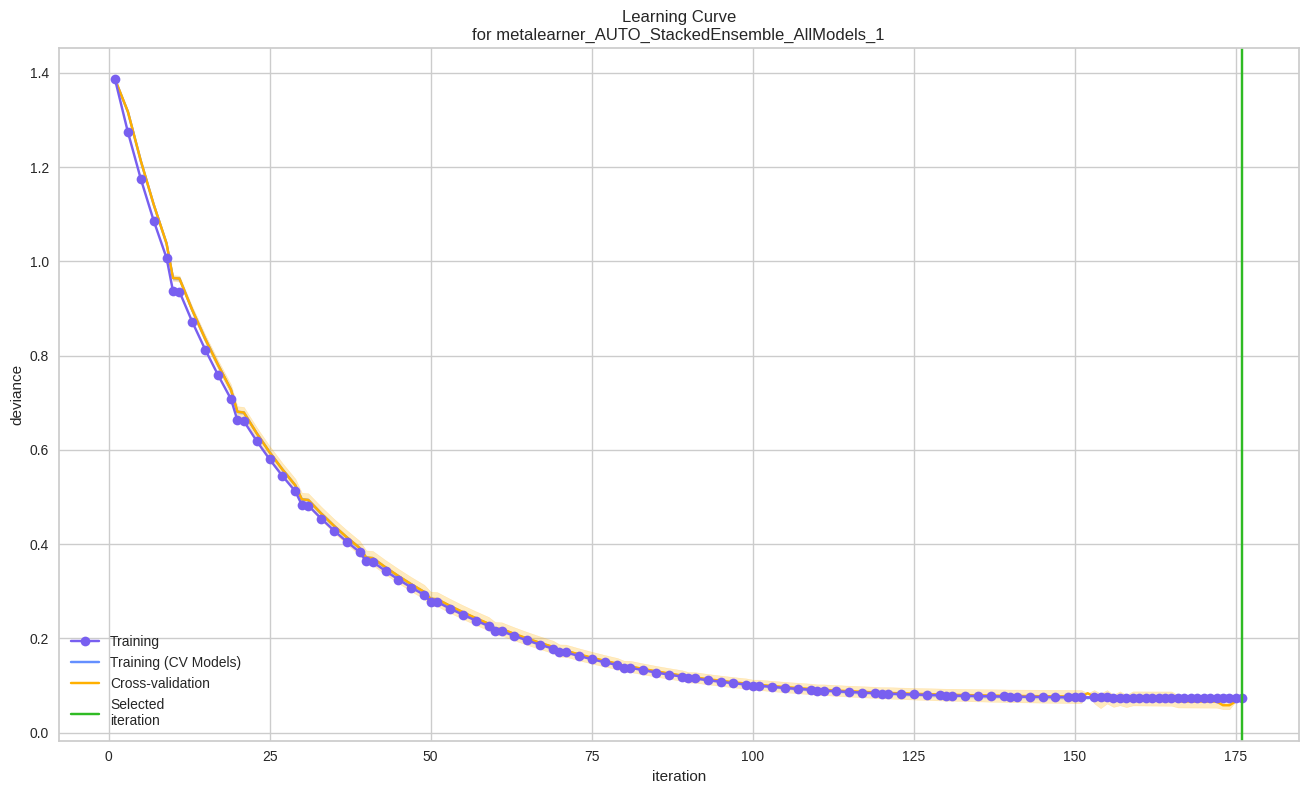

In [ ]:
learning_curve_plot = aml.leader.learning_curve_plot()

## Predict with AutoML

In [ ]:
# Import test data
test_frame = h2o.import_file(path='/test.csv')

# Drop ID column for test set
X_test_frame = test_frame.drop('Response')
y_test_frame = test_frame[:, 'Response']

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Get dataframe of all runs
all_experiments = [exp.experiment_id for exp in client.search_experiments()]
runs = mlflow.search_runs(experiment_ids = all_experiments, run_view_type = ViewType.ALL)

# Identify best model (experiment id and run id) amongst all runs in the experiment
run_id, exp_id = runs.loc[runs['metrics.log_loss'].idxmin()]['run_id'], runs.loc[runs['metrics.log_loss'].idxmin()]['experiment_id']
run_id, exp_id

('d1008311dbd84ef383d1226be601d01c', '105580036626967464')

In [ ]:
# Load best model (AutoML leader)
best_model = mlflow.h2o.load_model(f"mlruns/{exp_id}/{run_id}/artifacts/model/")

# Generate predictions with best model (output is H2O frame)
preds_frame = best_model.predict(X_test_frame)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
preds_frame

predict,p-1,p1
-1,0.999997,2.9313e-06
-1,1,5.0127e-13
1,0.00300841,0.996992
-1,1,1.12917e-08
1,0.0011565,0.998843
1,0.00382851,0.996171
1,0.00307009,0.99693
1,0.0019284,0.998072
1,0.00475664,0.995243
1,0.00137265,0.998627


In [ ]:
y_pred = preds_frame.as_data_frame()['predict']
y_true = y_test_frame.as_data_frame()['Response']

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred

0     -1
1     -1
2      1
3     -1
4      1
5      1
6      1
7      1
8      1
9      1
10    -1
11    -1
12     1
13    -1
14     1
15    -1
16     1
17    -1
18     1
19    -1
20     1
21    -1
22     1
23     1
24    -1
25     1
26    -1
27     1
28     1
29    -1
30    -1
31     1
32     1
33    -1
34     1
35    -1
36    -1
37     1
38    -1
39     1
40    -1
41     1
42    -1
43     1
44    -1
45    -1
46     1
47    -1
48    -1
49    -1
50     1
51    -1
52    -1
53    -1
54     1
55     1
56     1
57    -1
58     1
59     1
60    -1
61     1
62    -1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70    -1
71    -1
72    -1
73     1
74     1
75     1
76     1
77     1
78    -1
79    -1
80    -1
81     1
82     1
83     1
84     1
85     1
86    -1
87     1
88    -1
89     1
90     1
91    -1
92    -1
93     1
94     1
95     1
96    -1
97     1
98    -1
99     1
100    1
101    1
102    1
103   -1
104    1
105    1
106    1
107    1
108    1
109    1
110   -1
1

In [ ]:
y_true

0     -1
1     -1
2      1
3     -1
4      1
5      1
6      1
7      1
8      1
9      1
10    -1
11    -1
12     1
13    -1
14     1
15    -1
16     1
17    -1
18     1
19    -1
20     1
21    -1
22     1
23     1
24    -1
25     1
26    -1
27     1
28     1
29    -1
30    -1
31     1
32     1
33    -1
34     1
35    -1
36    -1
37     1
38    -1
39     1
40    -1
41     1
42    -1
43     1
44    -1
45    -1
46     1
47    -1
48    -1
49    -1
50     1
51    -1
52    -1
53    -1
54     1
55     1
56     1
57    -1
58     1
59     1
60    -1
61     1
62    -1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70    -1
71    -1
72    -1
73     1
74     1
75     1
76     1
77     1
78    -1
79    -1
80    -1
81     1
82     1
83     1
84     1
85     1
86    -1
87     1
88    -1
89     1
90     1
91    -1
92    -1
93     1
94     1
95     1
96    -1
97     1
98    -1
99     1
100    1
101    1
102    1
103   -1
104    1
105    1
106    1
107    1
108    1
109    1
110   -1
1

In [ ]:
f1_score(y_true, y_pred)


1.0

In [ ]:
accuracy_score(y_true, y_pred)


1.0

In [ ]:
!zip -r mlruns.zip mlruns/

  adding: mlruns/ (stored 0%)
  adding: mlruns/0/ (stored 0%)
  adding: mlruns/0/meta.yaml (deflated 25%)
  adding: mlruns/465920473530289427/ (stored 0%)
  adding: mlruns/465920473530289427/meta.yaml (deflated 31%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/ (stored 0%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/artifacts/ (stored 0%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/artifacts/model/ (stored 0%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/artifacts/model/python_env.yaml (deflated 18%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/artifacts/model/requirements.txt (deflated 24%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/artifacts/model/conda.yaml (deflated 37%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059f8f4b5ba/artifacts/model/model.h2o/ (stored 0%)
  adding: mlruns/465920473530289427/5dc1ce13bb3844f4b3c68059